# BUSINESS CASE:

# Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.

# INTRODUCTION OF PROJECT

- A credit card is a financial instrument, which can be used more than once to borrow money or buy products and services on credit.
- Banks, retail stores and other businesses generally issue these.

Credit limit:-
- The maximum amount of charges a cardholder may apply to the account.

Annual fee:-
- A bank charge for use of a credit card levied each year, which ranges depending upon the type of card one possesses.Banks usually take an initial fixed amount in the first year and thena lower amount as yearly renewal fees. Revolving Line Of Credit.

TARGET COLUMN == Bad_label
- 0 Represent--Customer has Good credit history
- 1 Represent--Customer has Bad credit history

# PROJECT GOAL

- Build a model with the data provided
1. Data exploration insights – what did you find and what decision did you take?
2. Feature matrix - List of features selected with gain
3. Model evaluation - Gini and rank ordering

# IMPORTING NECESSARY LIBRARY

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

# MAKING CONNECTION TO DATA BASE SERVER

In [2]:
## making connection to database server
connection=mysql.connector.connect(host='18.136.157.135',
                                   port= '3306',
                                   user = 'dm_team1',
                                   password= 'DM!$Team&279@20!')

In [3]:
## check the number of databases available on the server
cursor = connection.cursor()
cursor.execute("show databases")
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [4]:
## making connection to database server
connection=mysql.connector.connect(host='18.136.157.135',
                                   port= '3306',
                                   user = 'dm_team1',
                                   password= 'DM!$Team&279@20!',
                                   database = 'project_banking')

In [5]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


- In this data 3 tables are there.

# FETCHING DATA FROM DATA BASE

# Customer Account Data (Table : Cust_Account):

- This table contains customer’s historical accounts data and payments history

In [6]:
query = 'select * from Cust_Account'
data1 = pd.read_sql(query,connection)
print(data1.shape)
data1

(186329, 21)


,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,24228,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,0,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,0,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,0,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


In [7]:
data1.head()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


In [8]:
data1.to_csv('Cust_Account.csv',index=False)

# Demographics Data (Table : Cust_Demographics):
- Current customer applications with demographic data
- Note that demographics features are renamed as features and obscured in accordance with privacy policies.

In [9]:
query = 'select * from  Cust_Demographics'
data2 = pd.read_sql(query,connection)
print(data2.shape)
data2

(23896, 83)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card 

In [10]:
data2.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


In [11]:
data2.to_csv('Cust_Demographics',index=False)

# Customer Enquiry Data (Table : Cust_Enquiry):
- This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.

In [12]:
query = 'select * from Cust_Enquiry '
data3 = pd.read_sql(query,connection)
print(data3.shape)
data3

(413188, 6)


,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


In [13]:
data3.to_csv(' Cust_Enquiry ',index=False)

In [14]:
data3.columns

Index(['dt_opened', 'customer_no', 'upload_dt', 'enquiry_dt', 'enq_purpose',
       'enq_amt'],
      dtype='object')

In [15]:
data4=data3.loc[:,['customer_no','enq_amt']]
data4.head()

,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000


In [16]:
Cust_group=data4.groupby(['customer_no'])
Cust_group.head()


,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000
...,...,...
413172,23896,10000
413173,23896,1000
413174,23896,15000
413175,23896,1000


In [17]:
df_amt=pd.DataFrame(Cust_group.sum()).reset_index()
df_amt.columns = ['customer_no','total_enq_amt']
print(df_amt.head())
print(df_amt.shape)

  customer_no                                      total_enq_amt
0           1  3500000500000500005000010001000100010001000150...
1          10  2000000200000002000000055000005500000100050000...
2         100  5000010000110000130000030000040000010000100001...
3        1000    10000100010000100001000050000500005000010001000
4       10000  9000200002220005000010000050000500005000056250...
(23896, 2)


In [18]:
data1_count=pd.DataFrame(Cust_group.count()).reset_index()
data1_count.columns = ['customer_no','total_enq_count']
data1_count.head()

,customer_no,total_enq_count
0,1,18
1,10,21
2,100,19
3,1000,10
4,10000,14


In [19]:
data_final=pd.merge(data1_count,df_amt,on='customer_no',how='inner')
data_final.head()

,customer_no,total_enq_count,total_enq_amt
0,1,18,3500000500000500005000010001000100010001000150...
1,10,21,2000000200000002000000055000005500000100050000...
2,100,19,5000010000110000130000030000040000010000100001...
3,1000,10,10000100010000100001000050000500005000010001000
4,10000,14,9000200002220005000010000050000500005000056250...


In [20]:
data_final.to_csv('Cust_enq_final.csv',index=False)

# Checking and extracting the data of Cust_Account table

In [21]:
data1.head()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


In [32]:
Collist = ['customer_no','high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'creditlimit','cashlimit']

In [33]:
data_acnt=data1.loc[:,Collist]
data_acnt.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,12265,20900,0,,,
1,12265,16201,10390,,14000,1400
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,


In [34]:
Cust_group_accnt=data_acnt.groupby(['customer_no'])
Cust_group_accnt.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,12265,20900,0,,,
1,12265,16201,10390,,14000,1400
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,
...,...,...,...,...,...,...
186317,1611,97741,0,,,
186318,1611,300000,287017,,,
186319,1611,34001,0,,,
186320,1611,42320,0,,42490,


In [38]:
data_acnt=pd.DataFrame(Cust_group_accnt.sum()).reset_index()
data_acnt

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,1,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,250000420000,168000
1,10,1111113565675230005500000531458600000111851500...,068994000178725000000,,405000,243000
2,100,747754333541229800010000454945000034240350000,3970033460980316015530000,,300009800059000,980017700
3,1000,548289548289147688,31349029113,,225000270000,6750081000
4,10000,52590480000562501997410200520000,1752758222031250-26123003454770,,60000,10000
...,...,...,...,...,...,...
23891,9995,124964496733869524900038822,117236492223702016887613554,,4900038800,9800
23892,9996,44000977215000031516,4400033111263042843,,65000,13000
23893,9997,22990100000175409959090000,00095830,,,
23894,9998,407621558523169,386371389419983,,4100015000,4100


In [39]:
data_acnt=pd.DataFrame(Cust_group_accnt.sum()).reset_index()

In [40]:
data_acnt.to_csv('Cust_Account_Final.csv',index=False)

# Checking and extracting the data of Cust_Demographics table

In [42]:
data2.to_csv('Cust_Demographics',index=False)
data2.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


In [43]:
DemColList=['dt_opened', 'customer_no', 'entry_time', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52',
       'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57',
       'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62',
       'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67',
       'feature_68', 'feature_69', 'feature_70', 'feature_71', 'feature_72',
       'feature_73', 'feature_74', 'feature_75', 'feature_76', 'feature_77',
       'feature_78', 'feature_79', 'Bad_label']

In [44]:
print(data_acnt.shape)
print(data2.shape)
print(data_final.shape)

(23896, 6)
(23896, 83)
(23896, 3)


In [45]:
data6_final=pd.merge(data2,data_acnt,on='customer_no',how='left')
print(data6_final.shape)
data6_final.head()

(23896, 88)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,250000420000,168000
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0,1000000117595,674724007,,1000000,1
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0,121523,17864,,,
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,,394000262000300000,23600010500020000
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0,1501591266293822042204,7973000000,,,


In [46]:
data6_final=pd.concat([data6_final,data_final],axis=1)
data6_final.shape

(23896, 91)

In [47]:
data6_final.to_csv('final_data.csv')

In [49]:
data7=pd.read_csv('final_data.csv')
data7.head()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,customer_no.1,total_enq_count,total_enq_amt
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,2.528847e+10,250000420000,168000,1,18,3500000500000500005000010001000100010001000150...
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,1000000117595,674724007,NaN,1000000,1,10,21,2000000200000002000000055000005500000100050000...
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,121523,17864,NaN,NaN,NaN,100,19,5000010000110000130000030000040000010000100001...
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,NaN,394000262000300000,23600010500020000,1000,10,10000100010000100001000050000500005000010001000
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,1501591266293822

# BASIC CHECKS

In [50]:
data7.head()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,customer_no.1,total_enq_count,total_enq_amt
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,2.528847e+10,250000420000,168000,1,18,3500000500000500005000010001000100010001000150...
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,1000000117595,674724007,NaN,1000000,1,10,21,2000000200000002000000055000005500000100050000...
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,121523,17864,NaN,NaN,NaN,100,19,5000010000110000130000030000040000010000100001...
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,NaN,394000262000300000,23600010500020000,1000,10,10000100010000100001000050000500005000010001000
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,1501591266293822

In [51]:
data7.tail()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,customer_no.1,total_enq_count,total_enq_amt
23891,23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704.0,1.0,Card Setup,14.0,119000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA05,MA01,NaN,NaN,1.0,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2.0,0.0,Graduate,New Delhi,110045.0,1988.0,10.0,Paren,Y,1.0,33000.0,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015.0,6.0,0.0,6.0,Gurgaon,122001.0,NaN,PAN Card,CUQPSXXXXX,NaN,NaN,Y,State Bank of India,99000.0,01-Jan-15,17-Jun-16,1.0,10.0,Y,N,Y,N,NaN,Y,1988-10,10.0,157.0,110045.0,0.0,1.0,33000.0,0-0,13.0,R,Y,NaN,0000-00-00,0.0,XXXXX,1.0,N,0,1500004108218500088626132761834010000010000036...,14694311646162680648430009911300,NaN,5000099000,1000029700,9995,17,1000050000150000500001500001000010000100005000...
23892,23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,NaN,NaN,2.0,Card Setup,14.0,35000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA03,AS33,NaN,NaN,1.0,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2.0,0.0,Graduate,New Delhi,110037.0,2014.0,12.0,Rente,N,1.0,1.0,Private Ltd. Co.,Others,ENGINEER,2012.0,12.0,3.0,0.0,New Delhi,110037.0,@GMAIL.COM,PAN Card,DTPPSXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,N,N,Y,N,NaN,Y,2014-12,33.0,102.0,282001.0,1.0,1.0,1.0,0-0,10.0,O,Y,NaN,0000-00-00,0.0,99101XXXXX,1.0,N,0,27314,16393,NaN,NaN,NaN,9996,8,1000004400044000500001500005000010001000
23893,23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748.0,3.0,Card Setup,14.0,68000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,CD01,D066,NaN,NaN,1.0,CPOPSXXXXX,08-Nov-86,99111XXXXX,Y,@GMAIL.COM,2.0,0.0,Graduate,New Delhi,110033.0,1986.0,0.0,Paren,Y,1.0,1.0,Private Ltd. Co.,Health Care,SENIOR ANALYST,2015.0,1.0,3.0,0.0,Gurgaon,122016.0,@ACCRETIVEHEALTH.COM,PAN Card,CPOPSXXXXX,NaN,NaN,Y,HDFC Bank,52000.0,01-Sep-14,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,1986-0,10.0,157.0,110033.0,0.0,1.0,1.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,99111XXXXX,1.0,N,0,149402050013401,207700,NaN,14000,7000,9997,17,1000050000150005000015000970005000010001500001...
23894,23894,03-Nov-15,23895,30-Sep-15,Platinum Deligh,30-Sep-15,740.0,3.0,Card Setup,14.0,158000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA40,G011,NaN,NaN,1.0,AVZPGXXXXX,24-Nov-82,93100XXXXX,N,@GMAIL.COM,1.0,0.0,Graduate,New Delhi,110095.0,2010.0,0.0,Self,Y,2.0,25000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,New Delhi,110095.0,NaN,PAN Card,AVZPGXXXXX,NaN,NaN,Y,Citibank N.A.,65000.0,01-Apr-14,17-Jun-16,2.0,10.0,NaN,N,Y,N,NaN,Y,2010-0,10.0,157.0,110095.0,0.0,2.0,25000.0,03-May,10.0,R,NaN,NaN,0000-00-00,0.0,93100XXXXX,1.0,N,0,91873370504000006409211900034000,1707659253296561161764840,NaN,9900065000,2970010000,9998,6,50000500005000050000500001000
23895,23895,04-Dec-15,23896,06-Nov-15,Titanium Deligh,06-Nov-15,688.0,1.0,Card Setup,14.0,106000.0,NaN,NaN,NaN,Y,TD1,NaN,0.0,SA03,AS33,NaN,NaN,1.0,AJIPBXXXXX,15-Aug-83,97178XXXXX,N,@GMAIL.COM,1.0,0.0,Graduate,Ghaziabad,201005.0,2005.0,0.0,Paren,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Ghaziabad,201005.0,NaN,PAN Card,AJIPBXXXXX,NaN,NaN,Y,State Bank of India,106000.0,01-Feb-15,17-Jun-16,1.0,33.0,NaN,N,Y,N,NaN,Y,2005-0,33.0,41.0,201005.0,0.0,

In [52]:
data7.index

RangeIndex(start=0, stop=23896, step=1)

In [53]:
data7.shape

(23896, 92)

In [54]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23896 non-null  int64  
 1   dt_opened        23896 non-null  object 
 2   customer_no      23896 non-null  int64  
 3   entry_time       23881 non-null  object 
 4   feature_1        23881 non-null  object 
 5   feature_2        21060 non-null  object 
 6   feature_3        21060 non-null  float64
 7   feature_4        23881 non-null  float64
 8   feature_5        23881 non-null  object 
 9   feature_6        23881 non-null  float64
 10  feature_7        23881 non-null  float64
 11  feature_8        1261 non-null   object 
 12  feature_9        1261 non-null   object 
 13  feature_10       51 non-null     object 
 14  feature_11       23881 non-null  object 
 15  feature_12       23881 non-null  object 
 16  feature_13       10892 non-null  object 
 17  feature_14  

In [55]:
data7.describe()

,Unnamed: 0,customer_no,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label,amt_past_due,customer_no.1,total_enq_count
count,23896.000000,23896.000000,21060.000000,23881.000000,23881.0,2.388100e+04,16163.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,2.388100e+04,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,1.040000e+02,2.388100e+04,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,2.388100e+04,23881.000000,17.000000,23881.000000,23881.000000,23896.000000,7.860000e+02,23896.000000,23896.000000
mean,11947.500000,11948.500000,723.235945,2.321595,14.0,1.190705e+05,8.086618,1.049412,1.233910,0.725640,217620.229346,2001.183996,0.652318,1.238851,3.278933e+04,1533.268707,3.348352,5.702609,0.154139,222251.238474,2.724312e+11,6.500073e+04,1.085717,13.337465,14.587454,157.609732,264374.021440,0.184373,1.238851,3.278933e+04,14.539048,2.411765,0.003852,1.043214,0.042015,1.089207e+12,11948.500000,17.291095
std,6898.325352,6898.325352,37.318684,0.892838,0.0,7.752349e+04,5.625654,0.216731,0.423324,1.124986,159267.102213,11.993426,2.343709,0.430009,1.087860e+05,855.273257,3.587043,4.159316,0.930806,156846.154943,1.223114e+11,1.008225e+05,0.388569,8.285993,9.518517,190.979066,202001.890433,0.387796,0.430009,1.087860e+05,9.077906,0.618347,0.084286,0.224672,0.200628,1.836738e+13,6898.325352,15.248175
min,0.000000,1.000000,-1.000000,1.000000,14.0,0.000000e+00,0.000000,1.000000,1.000000,0.000000,110001.000000,1964.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,7.568570e+05,0.000000e+00,1.000000,2.000000,2.000000,1.000000,110001.000000,0.000000,1.000000,1.000000e+00,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000e+00,1.000000,1.000000
25%,5973.750000,5974.750000,698.000000,1.000000,14.0,7.200000e+04,0.000000,1.000000,1.000000,0.000000,110051.000000,1991.000000,0.000000,1.000000,1.000000e+00,1999.000000,0.000000,1.000000,0.000000,110044.000000,3.090000e+11,0.000000e+00,1.000000,10.000000,10.000000,39.000000,110059.000000,0.000000,1.000000,1.000000e+00,10.000000,2.000000,0.000000,1.000000,0.000000,1.555000e+02,5974.750000,7.000000
50%,11947.500000,11948.500000,721.000000,3.000000,14.0,1.040000e+05,12.000000,1.000000,1.000000,0.000000,110094.000000,2005.000000,0.000000,1.000000,3.000000e+04,2010.000000,2.000000,6.000000,0.000000,122001.000000,3.090000e+11,5.000000e+04,1.000000,10.000000,10.000000,157.000000,122012.000000,0.000000,1.000000,3.000000e+04,10.000000,2.000000,0.000000,1.000000,0.000000,1.580500e+03,11948.500000,13.000000
75%,17921.250000,17922.250000,745.000000,3.000000,14.0,1.390000e+05,12.000000,1.000000,1.000000,2.000000,390002.000000,2011.000000,0.000000,1.000000,4.300000e+04,2013.000000,6.000000,10.000000,0.000000,390002.000000,3.090000e+11,1.000000e+05,1.000000,13.000000,21.000000,157.000000,400601.000000,0.000000,1.000000,4.300000e+04,17.000000,3.000000,0.000000,1.000000,0.000000,1.235350e+04,17922.250000,23.000000
max,23895.000000,23896.000000,896.000000,3.000000,14.0,1.217000e+06,12.000000,2.000000,2.000000,10.000000,712245.000000,2015.000000,12.000000,3.000000,1.500000e+07,2015.000000,12.000000,11.000000,11.000000,712201.000000,8.090000e+11,3.777000e+06,4.000000,35.000000,35.000000,10008.000000,874401.000000,1.000000,3.000000,1.500000e+07,35.000000,4.000000,4.000000,3.000000,1.000000,4.430404e+14,23896.000000,308.000000


In [56]:
data7.describe(include='O')

,dt_opened,entry_time,feature_1,feature_2,feature_5,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_15,feature_16,feature_17,feature_18,feature_20,feature_21,feature_22,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_38,feature_43,feature_45,feature_46,feature_47,feature_48,feature_50,feature_51,feature_53,feature_54,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_70,feature_72,feature_73,feature_75,feature_77,feature_79,high_credit_amt,cur_balance_amt,creditlimit,cashlimit,total_enq_amt
count,23896,23881,23881,21060,23881,1261,1261,51,23881,23881,10892,23873,23869,1027,18,23896,23881,23896,23881,23256,20259,23881,23881,23881,18214,18214,18214,23881,10183,23802,23896,5497,23881,12474,12286,23881,2393,23881,23881,23881,9,23881,23881,23881,23881,2945,23881,23896,23881,23883,23896,19872,18435,23787
unique,197,296,7,281,1,19,19,9,2,16,14,364,522,302,12,10610,8462,3251,2,721,10,62,5,2,9,11,5663,70,4472,5,11250,56,2,10,180,1,2,2,2,2,8,2,491,133,2,2,62,3124,2,23802,23627,10944,8286,22265
top,16-Nov-15,19-Oct-15,Platinum Maxima,19-Oct-15,Card Setup,ROTVR,Negative Office Tele Verification,3.09E+11,Y,PM1,PD3,SA03,AS19,5622,180,AXMPKXXXXX,01-Jan-85,99999XXXXX,N,@GMAIL.COM,Graduate,New Delhi,Self,Y,Private Ltd. Co.,Banking/Financial Services,MANAGER,New Delhi,@GMAIL.COM,PAN Card,XXXXX,HDFC Bank,Y,HDFC Bank,01-Jun-14,17-Jun-16,Y,N,Y,N,GNWX-B,Y,2010-0,0-0,R,Y,0000-00-00,XXXXX,N,100000100000,0,50000,10000,500001000
freq,699,180,9056,182,23881,336,336,35,22611,8853,8416,9331,1374,169,5,16,33,194,21528,15595,14610,12539,10833,19478,8677,13187,1624,9760,1854,22796,94,1368,12565,5704,624,23881,2242,23425,22611,23563,2,23876,1670,18235,15617,2126,23820,2149,23876,13,73,369,652,212


# Drop feature_6 because constant column is present in data(feature_6)

In [57]:
data7.drop('feature_6',inplace=True,axis=1)


In [58]:
data7.head()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,customer_no.1,total_enq_count,total_enq_amt
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,2.528847e+10,250000420000,168000,1,18,3500000500000500005000010001000100010001000150...
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,1000000117595,674724007,NaN,1000000,1,10,21,2000000200000002000000055000005500000100050000...
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,121523,17864,NaN,NaN,NaN,100,19,5000010000110000130000030000040000010000100001...
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,NaN,394000262000300000,23600010500020000,1000,10,10000100010000100001000050000500005000010001000
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,1501591266293822042204,7973000000,NaN,NaN,NaN,10000

# IMPORTANT NOTE:
- IN THIS DATA WE CANNOT DO ANY DOMAIN ANALYSIS BECAUSE DATA IS   CONTAINING PRIVATE INFORMATION OF CUSTOMER DETAILS OF THE BANK.

# EXPLORATORY DATA ANALYSIS (EDA)

# TARGET COLUMN

In [59]:
data7.Bad_label.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

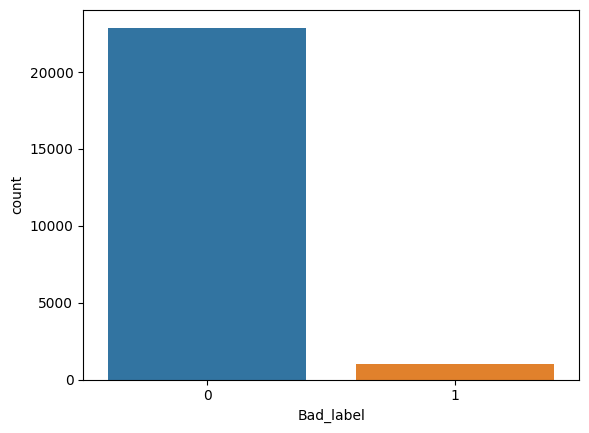

In [60]:
sns.countplot(data7.Bad_label)
plt.show()

- In this plot we are clearly seen the 90% Customer has Good credit 
and 10% customer are did not do has Good credit.

In [61]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data7)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

TypeError: 

Column [feature_10] has a 'mixed' inferred_type (as determined by Pandas).
This is is not currently supported; column types should not contain mixed data.
e.g. only floats or strings, but not a combination.

POSSIBLE RESOLUTIONS:
BEST -> Make sure series [feature_10] only contains a certain type of data (numerical OR string).
OR -> Convert series [feature_10] to a string (if makes sense) so it will be picked up as CATEGORICAL or TEXT.
     One way to do this is:
     df['feature_10'] = df['feature_10'].astype(str)
OR -> Convert series [feature_10] to a numerical value (if makes sense):
     One way to do this is:
     df['feature_10'] = pd.to_numeric(df['feature_10'], errors='coerce')
     # (errors='coerce' will transform string values to NaN, that can then be replaced if desired; consult Pandas manual pages for more details)


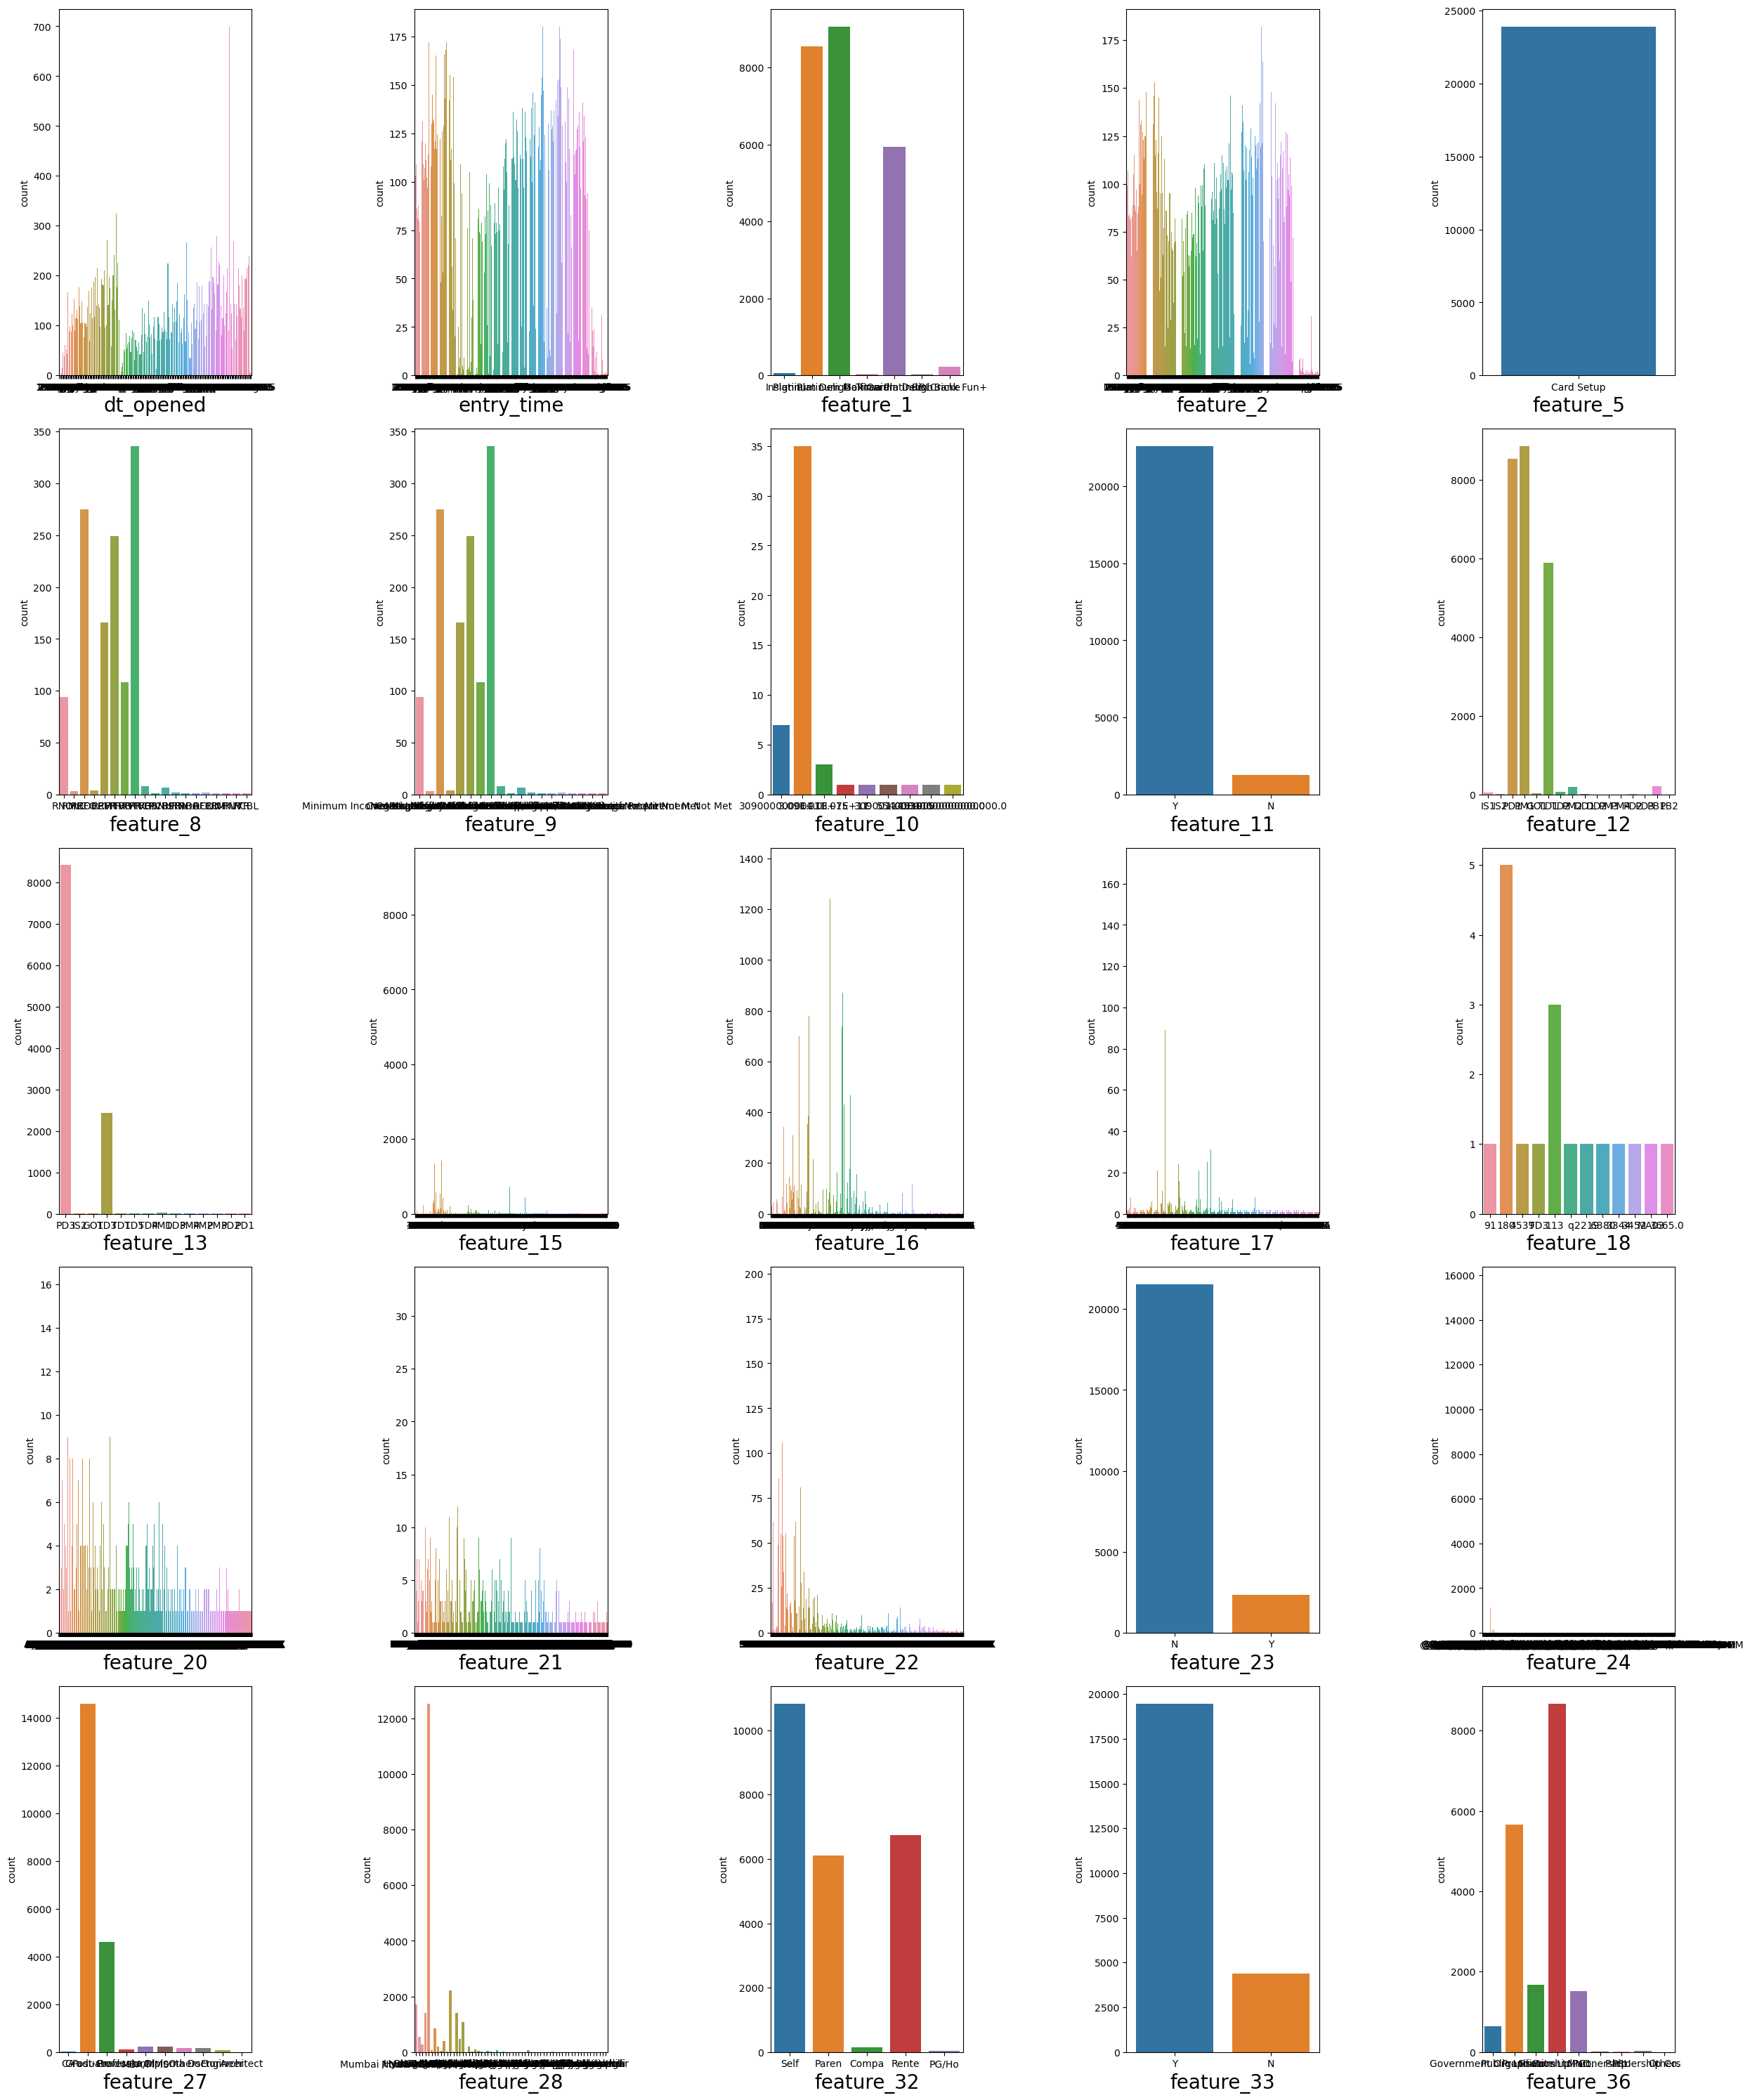

In [89]:
Object=['dt_opened','entry_time','feature_1','feature_2','feature_5','feature_8','feature_9','feature_10','feature_11',
        'feature_12','feature_13','feature_15','feature_16','feature_17','feature_18','feature_20','feature_21','feature_22',
        'feature_23','feature_24','feature_27','feature_28','feature_32','feature_33','feature_36','feature_37','feature_38',
        'feature_43','feature_45','feature_46','feature_47','feature_48','feature_50','feature_51','feature_53','feature_54',
        'feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_70','feature_72',
        'feature_73','feature_75','feature_77','feature_79','high_credit_amt','cur_balance_amt','creditlimit','cashlimit']
plt.figure(figsize=(25,30)) # defining canvas size
plotno = 1 # counter

for column in Object: # iteration of columns / acessing the columns from  dataset 
    if plotno<=25:    # set the limit
        plt.subplot(5,5,plotno) # # plotting 49 graphs (7-rows,7-columns) ,plotnumber is for count
        sns.countplot(x=data7[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

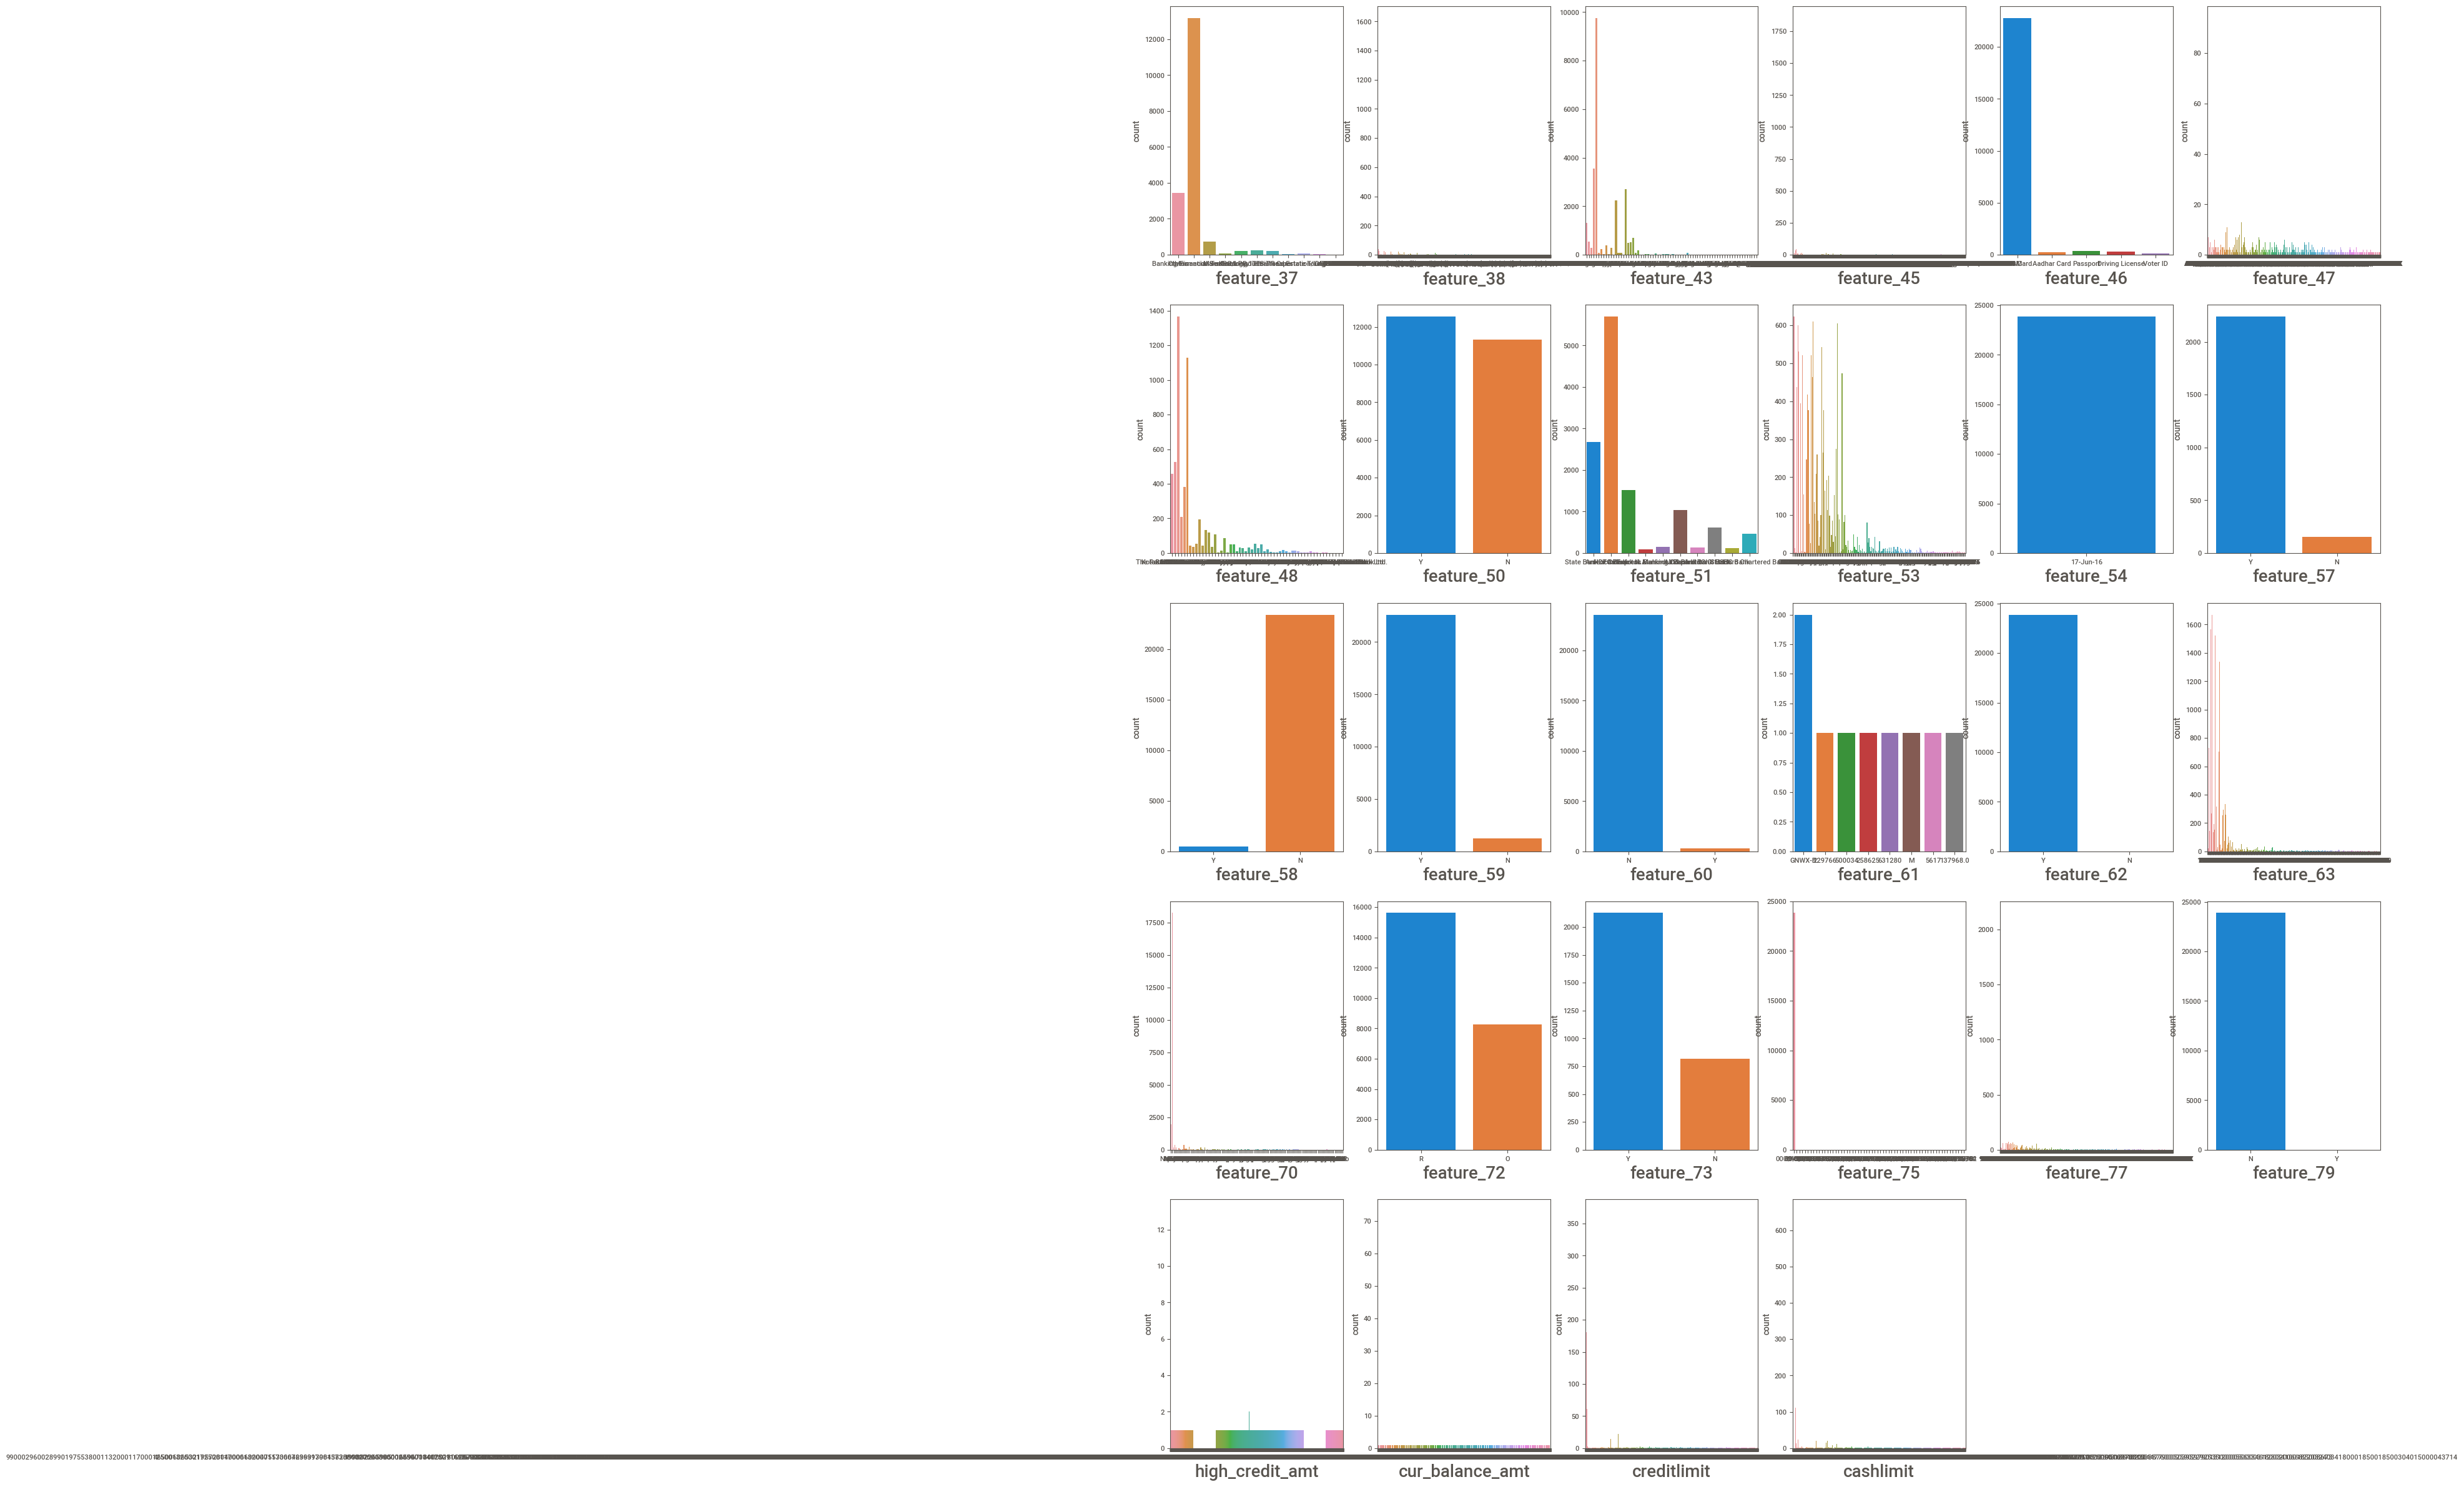

In [64]:
Object=['feature_37','feature_38','feature_43','feature_45','feature_46','feature_47','feature_48','feature_50','feature_51',
        'feature_53','feature_54','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63',
        'feature_70','feature_72','feature_73','feature_75','feature_77','feature_79','high_credit_amt','cur_balance_amt',
        'creditlimit','cashlimit']
plt.figure(figsize=(25,30)) # defining canvas size
plotno = 1 # counter

for column in Object: # iteration of columns / acessing the columns from  dataset 
    if plotno<=30:    # set the limit
        plt.subplot(5,6,plotno) # # plotting 4 graphs (2-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=data7[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

In [ ]:
data7.boxplot(figsize = (100,100),vert = False)

In [46]:
data7.replace(['?','*','$',' ','  ',''],np.nan,inplace=True)

# DATA PREPROCESSING / FEATURE ENIGNEERING

# 1.CHECK MISSING VALUE

In [47]:
data7.isnull().sum()

Unnamed: 0            0
dt_opened             0
customer_no           0
entry_time           15
feature_1            15
                   ... 
creditlimit        4024
cashlimit          5461
customer_no.1         0
total_enq_count       0
total_enq_amt       109
Length: 91, dtype: int64

In [47]:
data7.loc[:,['feature_36','feature_37','feature_46','feature_48']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   feature_36  18214 non-null  object
 1   feature_37  18214 non-null  object
 2   feature_46  23802 non-null  object
 3   feature_48  5497 non-null   object
dtypes: object(4)
memory usage: 746.9+ KB


# Create function to check missing value with percentage

In [48]:
def missing_value(data7):
    null_value = data7.isnull().sum()
    percentage = (data7.isnull().sum()/data7.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data7)

,Missing Number,Missing Percentage
Unnamed: 0,0,0.000000
dt_opened,0,0.000000
customer_no,0,0.000000
entry_time,15,0.062772
feature_1,15,0.062772
...,...,...
creditlimit,4024,16.839638
cashlimit,5461,22.853197
customer_no.1,0,0.000000
total_enq_count,0,0.000000


- In this dataset missing values are available

# Imputation using inbuild method fillna.

In [49]:
data7['high_credit_amt'] = data7['high_credit_amt'].fillna(data7['high_credit_amt'].mode()[0])
data7['amt_past_due'] = data7['amt_past_due'].fillna(data7['amt_past_due'].mode()[0])
data7['creditlimit'] = data7['creditlimit'].fillna(data7['creditlimit'].mode()[0])
data7['cashlimit'] = data7['cashlimit'].fillna(data7['cashlimit'].mode()[0])
data7['total_enq_amt'] = data7['total_enq_amt'].fillna(data7['total_enq_amt'].mode()[0])

In [50]:
data7.isnull().sum()

Unnamed: 0          0
dt_opened           0
customer_no         0
entry_time         15
feature_1          15
                   ..
creditlimit         0
cashlimit           0
customer_no.1       0
total_enq_count     0
total_enq_amt       0
Length: 91, dtype: int64

In [52]:
data7.head()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,customer_no.1,total_enq_count,total_enq_amt
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,2.528847e+10,250000420000,168000,1,18,3500000500000500005000010001000100010001000150...
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,1000000117595,674724007,4.000000e+02,1000000,1,10,21,2000000200000002000000055000005500000100050000...
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,121523,17864,4.000000e+02,50000,10000,100,19,5000010000110000130000030000040000010000100001...
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,4.000000e+02,394000262000300000,23600010500020000,1000,10,10000100010000100001000050000500005000010001000
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,15015912662938220422

2.OUTLIER HANDLING
- From the above EDA we seen the feature are private information.
- Not impute the outlier we are scaling to robust the outlier

In [51]:
data7.loc[:,['feature_36','feature_37','feature_46','feature_48']]=data7.loc[:,['feature_36','feature_37','feature_46','feature_48']].replace(np.nan,'others')

In [52]:
from collections import Counter
Counter(data7.feature_36)

Counter({'others': 5682,
         'Government Organisation': 642,
         'Public Ltd Co.': 5665,
         'Proprietorship': 1669,
         'Private Ltd. Co.': 8677,
         'MNC': 1511,
         'Partnership': 6,
         'PSU': 21,
         'Partnership Co.': 22,
         'Others': 1})

In [53]:
data8=data7.loc[:,['customer_no','feature_1','feature_4', 'feature_5', 
        'feature_7','feature_11', 'feature_19', 
        'feature_23','feature_25', 'feature_26', 'feature_27','feature_29', 'feature_30',
        'feature_31', 'feature_32','feature_33', 'feature_34', 'feature_35', 'feature_36', 
        'feature_37', 'feature_40', 'feature_41', 'feature_42','feature_44',
        'feature_46', 'feature_48', 'feature_55', 'feature_56', 'feature_58',
        'feature_59', 'feature_60', 'feature_62','feature_64', 'feature_65', 'feature_67',
       'feature_68', 'feature_69', 'feature_71', 'feature_72','feature_76', 'feature_78', 
       'feature_79', 'Bad_label', 'high_credit_amt','cur_balance_amt', 'amt_past_due',
        'creditlimit','cashlimit', 'total_enq_amt', 'total_enq_count']]

In [56]:
data8.head()

,customer_no,feature_1,feature_4,feature_5,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,1,Insignia,2.0,Card Setup,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,others,others,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,2.528847e+10,250000420000,168000,3500000500000500005000010001000100010001000150...,18
1,2,Insignia,1.0,Card Setup,1200000.0,Y,1.0,N,1.0,2.0,NaN,560042.0,1969.0,0.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,560042.0,PAN Card,The Ratnakar Bank Ltd.,1.0,17.0,Y,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,1000000117595,674724007,4.000000e+02,1000000,1,2000000200000002000000055000005500000100050000...,21
2,3,Insignia,1.0,Card Setup,700000.0,Y,2.0,N,1.0,0.0,NaN,560042.0,1966.0,0.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,560042.0,PAN Card,others,3.0,17.0,N,Y,N,Y,17.0,12.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0,121523,17864,4.000000e+02,50000,10000,5000010000110000130000030000040000010000100001...,19
3,4,Insignia,1.0,Card Setup,500000.0,Y,1.0,N,1.0,3.0,NaN,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,others,others,0.0,0.0,0.0,411026.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,16.0,0.0,2.0,100000.0,21.0,R,1.0,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,4.000000e+02,394000262000300000,23600010500020000,10000100010000100001000050000500005000010001000,10
4,5,Insignia,3.0,Card Setup,500000.0,Y,1.0,N,1.0,3.0,NaN,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,others,others,0.0,0.0,0.0,122009.0,PAN Card,The Ratnakar Bank Ltd.,1.0,13.0,Y,Y,N,Y,13.0,3.0,0.0,2.0,300000.0,13.0,R,0.0,1.0,N,0,1501591266293822042204,7973000000,4.000000e+02,50000,10000,9000200002220005000010000050000500005000056250...,14


In [54]:
print(data8.shape)
data8.dropna(inplace=True)
print(data8.shape)

(23896, 50)
(20259, 50)


In [55]:
data8.to_csv('cleansed_data_feat_engg.csv',index=False)

In [56]:
data9=pd.read_csv('cleansed_data_feat_engg.csv')
data9.head()

,customer_no,feature_1,feature_4,feature_5,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,48,Insignia,3.0,Card Setup,50000.0,Y,1.0,Y,1.0,3.0,CA,110018.0,1985.0,0.0,Self,Y,1.0,1.0,Private Ltd. Co.,Banking/Financial Services,5.0,3.0,5.0,110062.0,PAN Card,others,1.0,10.0,N,Y,N,Y,10.0,157.0,0.0,1.0,1.0,10.0,R,0.0,1.0,N,0,1286930009888569769352642500000400000015000001...,0300085929737646375302163610343369512531961382...,400.0,10800020000020000010000003900044200034900026000,21600500001560026500016600010400,1000001450000145000000150000050000000100000050...,24
1,51,Insignia,3.0,Card Setup,390000.0,N,1.0,N,1.0,2.0,Graduate,400037.0,1995.0,4.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,401208.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,N,N,Y,21.0,15.0,0.0,2.0,1.0,21.0,R,0.0,1.0,N,0,7643340622660000030000001268538120000162000002...,00656579028631281219189114465-1020613731923378...,400.0,3900001330001000133000150000140001000012500032...,1330010005000013000,100000100020000015000090000900001000,7
2,52,Insignia,1.0,Card Setup,500000.0,Y,1.0,N,1.0,3.0,Post-Graduate,700054.0,2005.0,0.0,Self,Y,2.0,1.0,others,others,0.0,0.0,0.0,700006.0,PAN Card,The Ratnakar Bank Ltd.,1.0,35.0,Y,Y,Y,Y,35.0,58.0,0.0,2.0,1.0,35.0,R,0.0,1.0,N,0,3113911980111980140363552267875880,01480419120-100,400.0,213000213000187000,128000128000112000,3000000500001000000100000020000001500000200000...,150
3,55,Insignia,1.0,Card Setup,338000.0,Y,1.0,Y,1.0,1.0,Graduate,110002.0,2004.0,0.0,Self,Y,1.0,1.0,Private Ltd. Co.,Others,1.0,6.0,0.0,110002.0,PAN Card,others,1.0,10.0,N,Y,N,Y,10.0,157.0,0.0,1.0,1.0,10.0,O,0.0,1.0,N,0,16950510580,13425-1787,400.0,260000,10000,2700000121000121000121000100003370015000500001...,16
4,56,Platinum Maxima,3.0,Card Setup,133000.0,Y,1.0,Y,2.0,0.0,Post-Graduate,400101.0,1999.0,0.0,Paren,Y,1.0,44040.0,Public Ltd Co.,Banking/Financial Services,9.0,4.0,0.0,400610.0,PAN Card,HDFC Bank,1.0,21.0,N,Y,N,Y,21.0,15.0,0.0,1.0,44040.0,21.0,R,0.0,1.0,N,0,35000039373372425000034225,18847637284000,400.0,40000,8000,400000500005000010000010000150000100000,8


# 2. FEATURE SELECTION

In [57]:
data9.corr()

,customer_no,feature_4,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_40,feature_41,feature_42,feature_44,feature_55,feature_56,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78,Bad_label,amt_past_due,total_enq_count
customer_no,1.000000,-0.255067,-0.030135,-0.005072,0.034513,-0.325468,-0.210328,-0.023514,0.190172,0.002531,-0.115410,0.001009,-0.048100,0.019069,-0.205851,-0.007624,0.019525,0.033495,0.052336,0.032232,0.002531,-0.115410,0.046809,0.009640,-0.008700,0.000924,-0.001380,0.030758
feature_4,-0.255067,1.000000,-0.056963,-0.015946,0.024124,0.266333,-0.083777,0.024582,-0.269728,-0.067645,0.059022,-0.013348,0.037788,0.010485,-0.081582,-0.016662,0.005376,0.029381,0.040106,0.063453,-0.067645,0.059022,0.016880,-0.001408,0.031022,0.010260,0.007600,0.004645
feature_7,-0.030135,-0.056963,1.000000,-0.020263,-0.130057,0.083918,0.024347,-0.053184,-0.017379,0.100345,0.118615,-0.072455,0.032612,-0.046039,0.018308,-0.012011,0.028093,0.000236,-0.050311,-0.060686,0.100345,0.118615,0.001414,0.031674,-0.008167,-0.065753,-0.005532,-0.006088
feature_19,-0.005072,-0.015946,-0.020263,1.000000,0.021109,-0.036614,-0.018947,0.032981,0.006995,0.026666,-0.008234,-0.017704,-0.035949,-0.004546,-0.019967,0.917688,-0.013264,-0.017300,-0.025704,-0.036517,0.026666,-0.008234,-0.015245,0.002867,-0.000848,0.003056,-0.002544,0.012332
feature_25,0.034513,0.024124,-0.130057,0.021109,1.000000,-0.252597,-0.038408,0.056876,0.003692,-0.103196,-0.051583,0.081369,-0.133066,0.092463,-0.026549,-0.034914,-0.023611,0.010616,0.029494,0.072693,-0.103196,-0.051583,0.029165,-0.020938,0.007585,0.019894,-0.006392,-0.006320
feature_26,-0.325468,0.266333,0.083918,-0.036614,-0.252597,1.000000,0.035304,-0.026604,-0.165525,0.010413,0.121813,-0.032371,0.105045,-0.045020,0.031413,-0.023824,0.045618,0.027486,-0.007045,-0.018026,0.010413,0.121813,0.023989,0.021321,0.017040,-0.020353,0.002041,0.007135
feature_29,-0.210328,-0.083777,0.024347,-0.018947,-0.038408,0.035304,1.000000,0.098092,0.021856,-0.028961,0.185617,0.111115,0.077523,0.002187,0.978790,-0.016261,0.121735,0.005138,-0.158226,-0.185719,-0.028961,0.185617,-0.024714,0.003422,0.017955,-0.009077,0.009481,-0.014464
feature_30,-0.023514,0.024582,-0.053184,0.032981,0.056876,-0.026604,0.098092,1.000000,-0.007852,-0.216388,0.036057,0.152521,0.120194,0.048132,0.095815,0.040592,0.072152,0.173520,0.136461,0.375187,-0.216388,0.036057,0.050487,-0.010232,0.057954,0.002185,0.001338,0.010304
feature_31,0.190172,-0.269728,-0.017379,0.006995,0.003692,-0.165525,0.021856,-0.007852,1.000000,0.020779,-0.038037,0.127868,-0.022898,0.024894,0.021035,0.007612,-0.016294,-0.021277,-0.018030,-0.035135,0.020779,-0.038037,-0.019070,0.000587,-0.051458,-0.006820,-0.003151,-0.016144
feature_34,0.002531,-0.067645,0.100345,0.026666,-0.103196,0.010413,-0.028961,-0.216388,0.020779,1.000000,0.019448,-0.510075,-0.750905,-0.092647,-0.045024,0.039984,-0.049950,-0.104478,-0.080593,-0.189197,1.000000,0.019448,-0.109477,0.020294,-0.042463,0.013382,-0.005906,-0.011965


# Plot hitmap for better visualisation
plt.figure(figsize=(20,25))
sns.heatmap(data9.corr(),annot=True,cmap='cool')
plt.show()

# Code to display highly correlated features

In [58]:
pd.set_option('display.max_rows',None)
corrmat = data9.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['corr','feature_4','feature_7']
corrmat

,corr,feature_4,feature_7
0,feature_44,feature_29,0.978790
1,feature_29,feature_44,0.978790
2,feature_19,feature_55,0.917688
3,feature_55,feature_19,0.917688


- Their is highly correlated feature in dataset

# 3.CHECKING DUPLICATES

In [59]:
data9.drop_duplicates(inplace=True)
data9.shape

(20259, 50)

In [60]:
data9.duplicated().sum()

0

- Their are no duplicates avialable in the data

# LabelEncoder:-

- Categorical feature convert into numerical

In [61]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [62]:
cols = ['feature_1','feature_5','feature_11','feature_23','feature_27','feature_32',
        'feature_33','feature_36','feature_37','feature_46','feature_48','feature_58',
        'feature_59','feature_60','feature_62','feature_72','feature_79','high_credit_amt',
        'creditlimit','cashlimit','total_enq_amt','cur_balance_amt']

# Encoding labels of multiple columns at once

data9[cols] = data9[cols].apply(LabelEncoder().fit_transform)

data9.head()

,customer_no,feature_1,feature_4,feature_5,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,48,1,3.0,0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,0,2285,3072,400.0,895,3245,749,24
1,51,1,3.0,0,390000.0,0,1.0,0,1.0,2.0,5,400037.0,1995.0,4.0,4,1,2.0,1.0,9,10,0.0,0.0,0.0,401208.0,2,47,1.0,21.0,1,0,0,1,21.0,15.0,0.0,2.0,1.0,21.0,1,0.0,1.0,0,0,18587,1853,400.0,4850,1790,634,7
2,52,1,1.0,0,500000.0,1,1.0,0,1.0,3.0,8,700054.0,2005.0,0.0,4,1,2.0,1.0,9,10,0.0,0.0,0.0,700006.0,2,47,1.0,35.0,1,1,1,1,35.0,58.0,0.0,2.0,1.0,35.0,1,0.0,1.0,0,0,9980,2333,400.0,3546,1663,11423,150
3,55,1,1.0,0,338000.0,1,1.0,1,1.0,1.0,5,110002.0,2004.0,0.0,4,1,1.0,1.0,6,6,1.0,6.0,0.0,110002.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,0,0.0,1.0,0,0,4213,6223,400.0,3998,2,11272,16
4,56,4,3.0,0,133000.0,1,1.0,1,2.0,0.0,8,400101.0,1999.0,0.0,2,1,1.0,44040.0,8,0,9.0,4.0,0.0,400610.0,2,16,1.0,21.0,0,1,0,1,21.0,15.0,0.0,1.0,44040.0,21.0,1,0.0,1.0,0,0,11117,8525,400.0,4906,6680,12589,8


In [63]:
data10 = data9.loc[:,['customer_no','feature_1','feature_4', 'feature_5', 
        'feature_7','feature_11', 'feature_19', 
        'feature_23','feature_25', 'feature_26', 'feature_27','feature_29', 'feature_30',
        'feature_31', 'feature_32','feature_33', 'feature_34', 'feature_35', 'feature_36', 
        'feature_37', 'feature_40', 'feature_41', 'feature_42','feature_44',
        'feature_46', 'feature_48', 'feature_55', 'feature_56', 'feature_58',
        'feature_59', 'feature_60', 'feature_62','feature_64', 'feature_65', 'feature_67',
       'feature_68', 'feature_69', 'feature_71', 'feature_72','feature_76', 'feature_78', 
       'feature_79', 'high_credit_amt','cur_balance_amt', 'amt_past_due',
        'creditlimit','cashlimit', 'total_enq_amt', 'total_enq_count','Bad_label']]

In [64]:
data10.head()

,customer_no,feature_1,feature_4,feature_5,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count,Bad_label
0,48,1,3.0,0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,2285,3072,400.0,895,3245,749,24,0
1,51,1,3.0,0,390000.0,0,1.0,0,1.0,2.0,5,400037.0,1995.0,4.0,4,1,2.0,1.0,9,10,0.0,0.0,0.0,401208.0,2,47,1.0,21.0,1,0,0,1,21.0,15.0,0.0,2.0,1.0,21.0,1,0.0,1.0,0,18587,1853,400.0,4850,1790,634,7,0
2,52,1,1.0,0,500000.0,1,1.0,0,1.0,3.0,8,700054.0,2005.0,0.0,4,1,2.0,1.0,9,10,0.0,0.0,0.0,700006.0,2,47,1.0,35.0,1,1,1,1,35.0,58.0,0.0,2.0,1.0,35.0,1,0.0,1.0,0,9980,2333,400.0,3546,1663,11423,150,0
3,55,1,1.0,0,338000.0,1,1.0,1,1.0,1.0,5,110002.0,2004.0,0.0,4,1,1.0,1.0,6,6,1.0,6.0,0.0,110002.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,0,0.0,1.0,0,4213,6223,400.0,3998,2,11272,16,0
4,56,4,3.0,0,133000.0,1,1.0,1,2.0,0.0,8,400101.0,1999.0,0.0,2,1,1.0,44040.0,8,0,9.0,4.0,0.0,400610.0,2,16,1.0,21.0,0,1,0,1,21.0,15.0,0.0,1.0,44040.0,21.0,1,0.0,1.0,0,11117,8525,400.0,4906,6680,12589,8,0


In [79]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20259 entries, 0 to 20258
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_no      20259 non-null  int64  
 1   feature_1        20259 non-null  int32  
 2   feature_4        20259 non-null  float64
 3   feature_5        20259 non-null  int32  
 4   feature_7        20259 non-null  float64
 5   feature_11       20259 non-null  int32  
 6   feature_19       20259 non-null  float64
 7   feature_23       20259 non-null  int32  
 8   feature_25       20259 non-null  float64
 9   feature_26       20259 non-null  float64
 10  feature_27       20259 non-null  int32  
 11  feature_29       20259 non-null  float64
 12  feature_30       20259 non-null  float64
 13  feature_31       20259 non-null  float64
 14  feature_32       20259 non-null  int32  
 15  feature_33       20259 non-null  int32  
 16  feature_34       20259 non-null  float64
 17  feature_35  

- HERE WE WILL BE EXPERIMENTING WITH ALGORITHM

# Scaling the data

In [65]:
X=data10.drop(labels=['Bad_label'],axis=1)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit_transform(X)


array([[0.00000000e+00, 1.66666667e-01, 1.00000000e+00, ...,
        4.53592396e-01, 3.95501109e-02, 9.09090909e-02],
       [1.25796713e-04, 1.66666667e-01, 1.00000000e+00, ...,
        2.50209673e-01, 3.34776640e-02, 2.37154150e-02],
       [1.67728950e-04, 1.66666667e-01, 0.00000000e+00, ...,
        2.32457367e-01, 6.03178794e-01, 5.88932806e-01],
       ...,
       [9.99916136e-01, 6.66666667e-01, 1.00000000e+00, ...,
        8.98378529e-01, 2.29485690e-01, 6.32411067e-02],
       [9.99958068e-01, 5.00000000e-01, 1.00000000e+00, ...,
        5.56052558e-01, 9.20424543e-01, 1.97628458e-02],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.47162427e-01, 7.50924068e-01, 5.13833992e-02]])

# Model Creation

In [67]:
X=data10.iloc[:,:-1]
y=data10.Bad_label

# SPLIT TRAINING AND TESTING DATA

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

# Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  

LogisticRegression()

In [116]:
y_pred=clf.predict(X_test)

In [117]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
y_pred_prob=clf.predict_proba(X_test)

In [119]:
data10.Bad_label.value_counts()

0    19391
1      868
Name: Bad_label, dtype: int64

In [120]:
pd.crosstab(y_pred,y_test)

Bad_label,0,1
row_0,,
0,4836,229


In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [122]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4836
           1       0.00      0.00      0.00       229

    accuracy                           0.95      5065
   macro avg       0.48      0.50      0.49      5065
weighted avg       0.91      0.95      0.93      5065



# Decision Tree

In [128]:
X=data10.iloc[:,:-1]
y=data10.Bad_label

In [125]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       1
53       0
54       0
55       1
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       1
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       1
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [129]:
## Balacing the data
from collections import Counter
# importing counter to check count of each label
from imblearn.over_sampling import SMOTE 
#for balancing the data
sm=SMOTE()#object creation
print(Counter(y))
# checking count for each class 
X_sm,y_sm=sm.fit_resample(X,y)
#applying sampling on target variable 
print(Counter(y_sm))
# checking count after sampling for  each class

Counter({0: 19391, 1: 868})
Counter({0: 19391, 1: 19391})


In [130]:
## preparing training and testing data
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [131]:
from sklearn.tree import DecisionTreeClassifier
#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()
#object creation for decision tree  
dt.fit(X_train,y_train)
#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [133]:
y_train_predict=dt.predict(X_train)#predicting training data to check training performance 
y_train_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [134]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
##Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

1.0

In [137]:

test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.9311056105610561

In [138]:
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.9314731226918342

In [136]:
print(classification_report(y_test,y_hat))# for  testing 

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4849
           1       0.93      0.94      0.93      4847

    accuracy                           0.93      9696
   macro avg       0.93      0.93      0.93      9696
weighted avg       0.93      0.93      0.93      9696



# Hyperparameters of DecisionTree

In [140]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, 
                       verbose=3, cv=3)

tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters




Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'})


In [141]:

Bestparamters: ({'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'})


In [143]:
tree_cv.best_score_

0.926390319489594

In [150]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'best'}

In [151]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf= 1,min_samples_split=4,splitter='best')#passing best parameter to decision tree

In [152]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_split=4)

In [153]:
y_hat1=dt1.predict(X_test)
y_hat1

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [154]:
acc_test=accuracy_score(y_test,y_hat1)
acc_test

0.931930693069307

In [155]:
test_f1=f1_score(y_test,y_hat1)#f1_score
test_f1

0.9319868095630668

In [156]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4849
           1       0.93      0.93      0.93      4847

    accuracy                           0.93      9696
   macro avg       0.93      0.93      0.93      9696
weighted avg       0.93      0.93      0.93      9696



# Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)  
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
y_predict=rf_clf.predict(X_test)

In [160]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4849
           1       1.00      0.96      0.98      4847

    accuracy                           0.98      9696
   macro avg       0.98      0.98      0.98      9696
weighted avg       0.98      0.98      0.98      9696



In [161]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.9765921552087726

# Hyperparameter Tuning Random Forest

In [162]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators=400, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap= False)#passing best parameter to randomforest
rf_clf2.fit(X_train, y_train)#training 
y_predict=rf_clf2.predict(X_test)#testing
f1_score=f1_score(y_test,y_predict)#checking performance

# Gradient Boosting DecisionTree (GBDT)

In [163]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price


In [164]:
## evaluatin the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
recall_scor=recall_score(y_test,y_gbm)
recall_scor

0.9020012378791005

In [165]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4849
           1       0.93      0.94      0.93      4847

    accuracy                           0.93      9696
   macro avg       0.93      0.93      0.93      9696
weighted avg       0.93      0.93      0.93      9696



# GB_XGB

In [166]:
import xgboost

In [167]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

In [169]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4849
           1       1.00      0.95      0.98      4847

    accuracy                           0.98      9696
   macro avg       0.98      0.98      0.98      9696
weighted avg       0.98      0.98      0.98      9696



In [170]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
recall_scor=recall_score(y_test,y_hat)
recall_scor

0.9531669073653807

In [171]:
f1_score1=f1_score(y_test,y_hat)
f1_score1

0.9755067567567568

In [175]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.4, 'n_estimators': 115, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 0})


In [176]:
XGB2=XGBClassifier(reg_lambda= 0.2, reg_alpha= 0.4, n_estimators=115, max_depth=12, learning_rate=0.2, gamma=0)
XGB2.fit(X_train, y_train)#training 
y_predict=XGB2.predict(X_test)#testing
f1_score=f1_score(y_predict,y_test)#checking performance

In [177]:
f1_score

0.9774451939291736

In [178]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4849
           1       1.00      0.96      0.98      4847

    accuracy                           0.98      9696
   macro avg       0.98      0.98      0.98      9696
weighted avg       0.98      0.98      0.98      9696



## Conclusion

- Logistic regression model training and testing score is good.

- XGB Classifier model is also well work on training and testing side the score of training 98.69 and testing score is 95.38 with f1 score is 98.00

- Decision Tree and Gradient Boosting have almost same f1 score as 93.00.

- From above all models we are select Decision Tree classifier.